In [1]:
import h5pyd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dateutil
from pyproj import Proj
from IPython.display import display

In [3]:
us = pd.read_csv('/Users/kook/Downloads/wtk_site_metadata.csv')
ca = us[(us.State == 'California') | (us.State == 'Illinois')]
ca.head()

,site_id,longitude,latitude,State,County,fraction_of_usable_area,power_curve,capacity,wind_speed,capacity_factor,full_timeseries_directory,full_timeseries_path
14960,14960,-114.758820,32.753693,California,Imperial,1.0,3,16,6.36,0.331,29,29/14960.nc
14961,14961,-114.737778,32.757912,California,Imperial,1.0,3,16,6.54,0.346,29,29/14961.nc
15019,15019,-114.784882,32.767143,California,Imperial,1.0,3,16,6.28,0.325,30,30/15019.nc
15020,15020,-114.763840,32.771389,California,Imperial,1.0,3,16,6.51,0.342,30,30/15020.nc
15021,15021,-114.742798,32.775600,California,Imperial,1.0,3,16,6.75,0.362,30,30/15021.nc


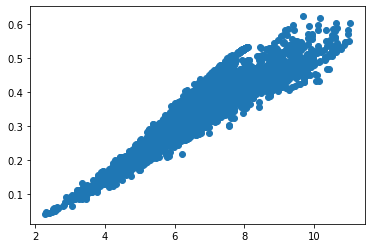

In [4]:
plt.scatter(ca['wind_speed'],ca['capacity_factor'])

In [5]:
df = pd.read_pickle('data/select-wind-power-0608-2.pkl')
df

,index,Year,Company Name,EIA\nPlant ID,CEC\nPlant ID,Plant Name,State,Capacity (MW),Gross MWh,Net MWh,...,mean_wind_speed,mean_cubed_wind_speed,elevation,temperature,pressure,wind_dir,precipitation,mo_length,humidity,DNI
0,106,2019.0,Terra-Gen Operating Company,57282,W0370,Alta I Wind Energy Center,CA,150.0,366369,366369,...,9.425920,1872.570190,1036.133301,288.227295,88728.085938,234.480484,0.010661,0.009081,39.630001,318.112457
1,107,2019.0,Terra-Gen Operating Company,57291,W0372,Alta II Wind Energy Center,CA,150.0,301923,301923,...,9.425920,1872.570190,1036.133301,288.227295,88728.085938,234.480484,0.010661,0.009081,39.630001,318.112457
2,108,2019.0,Terra-Gen Operating Company,57292,W0387,Alta III Wind Energy Center,CA,150.0,316458,316458,...,9.425920,1872.570190,1036.133301,288.227295,88728.085938,234.480484,0.010661,0.009081,39.630001,318.112457
3,109,2019.0,Terra-Gen Operating Company,57293,W0388,Alta IV Wind Energy Center,CA,102.0,152311,152311,...,9.425920,1872.570190,1036.133301,288.227295,88728.085938,234.480484,0.010661,0.009081,39.630001,318.112457
4,110,2019.0,Terra-Gen Operating Company,57294,W0389,Alta V Wind Energy Center,CA,168.0,253993,253993,...,9.425920,1872.570190,1036.133301,288.227295,88728.085938,234.480484,0.010661,0.009081,39.630001,318.112457
6,83,2019.0,See WPRS for details,Missing,W0441,Alta X Wind Energy Center,CA,136.8,366791,366791,...,10.198947,2822.561768,1106.125488,289.187439,88546.429688,208.627457,0.010661,-0.011136,34.789337,320.415619
8,11,2019.0,Foundation Windpower,57791,W0398,Anheuser-Busch,CA,1.5,2729,2729,...,5.761479,405.802246,7.402129,288.815918,100050.195312,219.042557,0.012751,0.023302,59.770611,281.142487
9,77,2019.0,See WPRS for details,Missing,W0426,Buena Vista Energy LLC,CA,38.0,87797,87797,...,6.980278,591.354126,336.164062,287.393921,96776.343750,215.660034,0.016932,0.020626,61.539883,287.672943
10,16,2019.0,Foundation Windpower,58102,W0403,Cemex BMQ,CA,3.0,3862,3862,...,6.194447,503.654907,1172.716553,288.212921,87930.929688,181.599884,0.018395,0.005302,39.544113,321.630554
11,12,2019.0,Foundation Windpower,58112,W0399,Cemex Madison,CA,1.0,1719,1719,...,4.939591,382.797638,41.151642,290.300537,99919.031250,229.128479,0.013169,-0.022644,51.132080,280.826965


In [45]:
farm_df = pd.read_csv('data/openei-wind-farm-sites.csv')
def parse_coords(in_s):
    try:
        s_list = str(in_s).split(',')
        return  [float(s[:-1]) for s in s_list]
    except:
        print('cannot parse ',in_s)
        return [np.nan,np.nan]
farm_df['latitude'], farm_df['longitude'] = list(zip(*farm_df['Coordinates'].apply(parse_coords)))

cannot parse  nan
cannot parse  nan


In [7]:
from geopy.distance import distance
def sq_dist(latlon1,latlon2): #should use geopy dist here
    return (latlon1[0]-latlon2[0])**2 + \
    (latlon1[1]-latlon2[1])**2
close_idx = [np.argmin([distance((lat1,lon1),(lat2,lon2)) for (lat2,lon2) in zip(ca['latitude'],ca['longitude'])])
    for (lat1,lon1) in list(zip(df['latitude'],df['longitude']))]

9209

In [59]:

[distance((lat,lon),(ca['latitude'].iloc[i],ca['longitude'].iloc[i])).miles
  for i,lat,lon in zip(close_idx,farm_df['latitude'],farm_df['longitude'])]

ValueError: Point coordinates must be finite. (nan, nan, 0.0) has been passed as coordinates.

In [8]:
df['nrel_cap_factor'] = [ca['capacity_factor'].iloc[i] for i in close_idx]

In [11]:
pow_curve = np.load('tmp.npy')

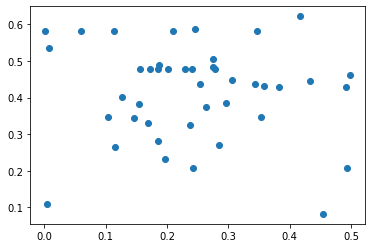

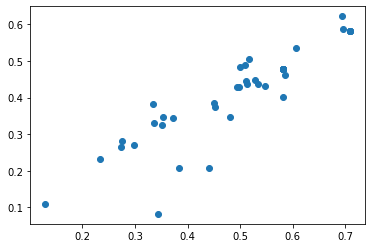

In [13]:
plt.scatter(df['per_turb_cap_frac'],df['nrel_cap_factor']);
plt.show()
plt.scatter(pow_curve,df['nrel_cap_factor'])

outliers
15, 16: Difwind I, II
27 : Mesa Wind
24: IEUA

In [34]:
df.iloc[24]

index                                      10
Year                                     2019
Company Name             Foundation Windpower
EIA\nPlant ID                           57792
CEC\nPlant ID                           W0397
Plant Name                               IEUA
State                                      CA
Capacity (MW)                               1
Gross MWh                                  44
Net MWh                                    44
mean MW                             0.0050248
cap_frac                            0.0050248
NumberOfUnits                               1
latitude                               34.085
longitude                            -117.527
per_turb_power                      0.0050248
per_turb_capacity                           1
per_turb_cap_frac                   0.0050248
mean_wind_speed                       3.83981
mean_cubed_wind_speed                 317.195
mean area                                 NaN
elevation                         

In [35]:
np.log10(df['nrel_cap_factor']/df['per_turb_cap_frac']).sort_values()

44   -0.742861
13   -0.374483
40   -0.067231
19   -0.059994
37   -0.033252
22   -0.024764
47   -0.008042
21    0.011270
20    0.040951
11    0.070670
25    0.081594
46    0.104131
26    0.112360
7     0.118961
35    0.127325
9     0.151509
14    0.164567
6     0.166248
33    0.174719
49    0.181257
42    0.216066
30    0.219227
8     0.224001
31    0.225654
50    0.234006
0     0.234842
28    0.245764
29    0.246400
48    0.263518
39    0.269360
43    0.288096
2     0.298445
1     0.318864
34    0.346190
41    0.348618
5     0.349846
12    0.364375
10    0.369201
32    0.376894
18    0.379304
17    0.390881
38    0.395030
36    0.413341
23    0.419757
4     0.443157
3     0.448538
45    0.499310
24    1.336308
27    1.787231
15    2.130020
16    2.444015
dtype: float64